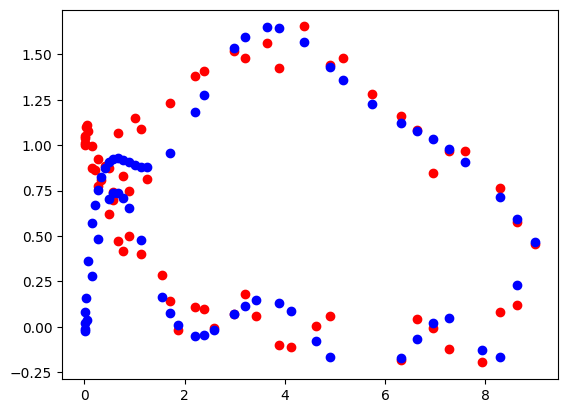

In [66]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def rsquare(y, ypredict):
    return 1-np.sum((y-ypredict)**2)/np.sum((y-np.mean(y))**2)

def MSE(y, ypredict):
    return 1/len(y)*(y.T-ypredict.T) @ (y-ypredict)

lambda_ = np.array([0.0001*10**i for i in range(0,5)])
n = 100
degree = np.array([5, 10, 15])

np.random.seed()
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
X = np.column_stack([x**i for i in range(0,degree[len(degree)-1]+1)])

MSE_train = np.zeros((len(lambda_),len(degree)))
MSE_test = np.zeros((len(lambda_), len(degree)))
MSE_OLS_train = np.zeros(len(degree))
MSE_OLS_test = np.zeros(len(degree))

# SCALING
# n = 1 passt nicht
# col_mean = np.column_stack([np.mean(X[:,i]) for i in range(0,degree[len(degree)-1]+1)])
#col_mean = 1/X.shape[0]*sum(X)
#for i in range(0, len(col_mean)):
    #X[:,i] = X[:,i] - col_mean[i]
#X_hut = [X[:,i] - col_mean[i] for i in range(0, len(col_mean))]

#X = np.array(X)
#X = X.T

# drop intercept
X = X[:,1:degree[len(degree)-1]+1]

for j in range(0, len(lambda_)):
    for i in range(0,len(degree)):

        X_tilde = X[:,0:degree[i]]
        X_train, X_test, y_train, y_test = train_test_split( X_tilde, y, test_size=0.33, random_state=42)

        x = X_train[:,1].reshape((len(X_train)),1)
        
        #beta
        beta= np.linalg.inv(X_train.T @ X_train + lambda_[j]*np.ones(degree[i])) @ X_train.T @ y_train
        #prediction
        ypredict = X_train @ beta

        MSE_train[j, i] = MSE(y_train, ypredict)
        rsquare_ = rsquare(y_train, ypredict)

        ypredict_test = X_test @ beta
        MSE_test[j, i] = MSE(y_test, ypredict_test)

        # OLS to compare
        beta_OSL= np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        ypredict_OLS_train = X_train @ beta
        ypredict_OLS_test= X_test @ beta

        MSE_OLS_train[i] = MSE(y_train, ypredict_OLS_train)
        MSE_OLS_test[i] = MSE(y_test, ypredict_OLS_test)



plt.plot(x, y_train, 'ro')
plt.plot(x,ypredict, 'bo')

# The limit of lambda going to zero equals OLS, therefore the closer lambda to zero the closer the MSE to the OLS MSE